<a href="https://colab.research.google.com/github/emailmenojunk/datascience/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 # list of 30 feature names
feature_names = [
    "mean radius", "mean texture", "mean perimeter", "mean area",
    "mean smoothness", "mean compactness", "mean concavity",
    "mean concave points", "mean symmetry", "mean fractal dimension",
    "radius error", "texture error", "perimeter error", "area error",
    "smoothness error", "compactness error", "concavity error",
    "concave points error", "symmetry error", "fractal dimension error",
    "worst radius", "worst texture", "worst perimeter", "worst area",
    "worst smoothness", "worst compactness", "worst concavity",
    "worst concave points", "worst symmetry", "worst fractal dimension"
]
# Load the data, assuming it has 32 columns: an ID,  a target & 30 features
# Using 'names' parameter to assign all column names at once
column_names = ['id'] + ['target'] + feature_names
df = pd.read_csv('/content/wdbc.csv', header=None, names=column_names)

In [4]:

#  split into feature and target variables
X = df.drop(columns=[df.columns[0], df.columns[1]])
y = df[df.columns[1]].map({'M': 1, 'B': 0})  # Convert 'M' to 1 and 'B' to 0

In [5]:
# View first 5 rows of the data
print(X.head(5))
print(y.head(5))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [ ]:
# How frequently does the positive target occur?
print(y.value_counts(normalize=True))
# Generate summary statistics for the data
print(X.describe())

In [ ]:
# Create a pairplot for the first few features
sns.pairplot(X.iloc[:, :5])

In [ ]:
# Create a correlation coefficeint heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

# Boxplot for target mean radius (first feature column)
sns.boxplot(x=y, y=X.iloc[:, 0])
plt.title('Boxplot of Mean Radius by Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Mean Radius')
plt.show()


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# # Create a logistic regression model with "liblinear" solver here.

model = LogisticRegression(solver='liblinear', random_state=42)
# # Fit the model on the training data
model.fit(X_train, y_train)
# # Make predictions on the test set
y_pred = model.predict(X_test)


In [18]:
# # Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[70  1]
 [ 4 39]]


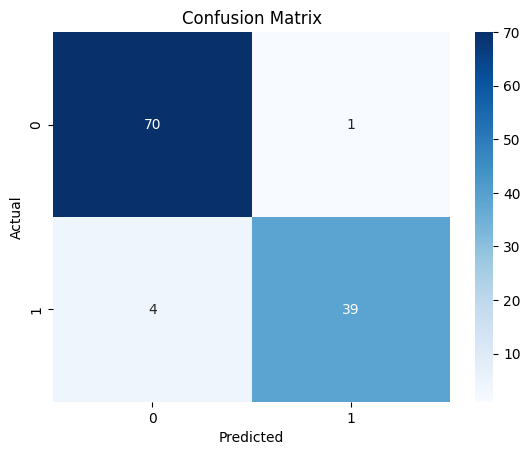

In [19]:
# Generate a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [21]:

# Extract the coefficients from the trained model
coefficients = model.coef_[0]
# Print the coefficients
print("Coefficients:")
print(coefficients)

Coefficients:
[-2.13218864e+00 -1.52840844e-01  1.44690095e-01  8.53787412e-04
  1.42679444e-01  4.15404045e-01  6.51908234e-01  3.44577724e-01
  2.07621260e-01  2.97454426e-02  5.00964813e-02 -1.44280764e+00
  3.03782103e-01  7.25838400e-02  1.61739031e-02  1.72936302e-03
  4.47004778e-02  3.77248161e-02  4.17272658e-02 -5.63749931e-03
 -1.23134184e+00  4.04614455e-01  3.64012445e-02  2.70666572e-02
  2.62732167e-01  1.20830314e+00  1.61753048e+00  6.15386796e-01
  7.42862567e-01  1.16876734e-01]


In [22]:
#Normalize the coefficients by the standard deviation of each feature in the training data
std_devs = X_train.std()
normalized_coefficients = coefficients / std_devs


In [23]:


#Sort feature names and coefficients by absolute value of coefficients.
sorted_indices = np.argsort(np.abs(normalized_coefficients))[::-1]
sorted_features = X.columns[sorted_indices]
sorted_coefficients = normalized_coefficients[sorted_indices]

/tmp/ipython-input-472951831.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_coefficients = normalized_coefficients[sorted_indices]


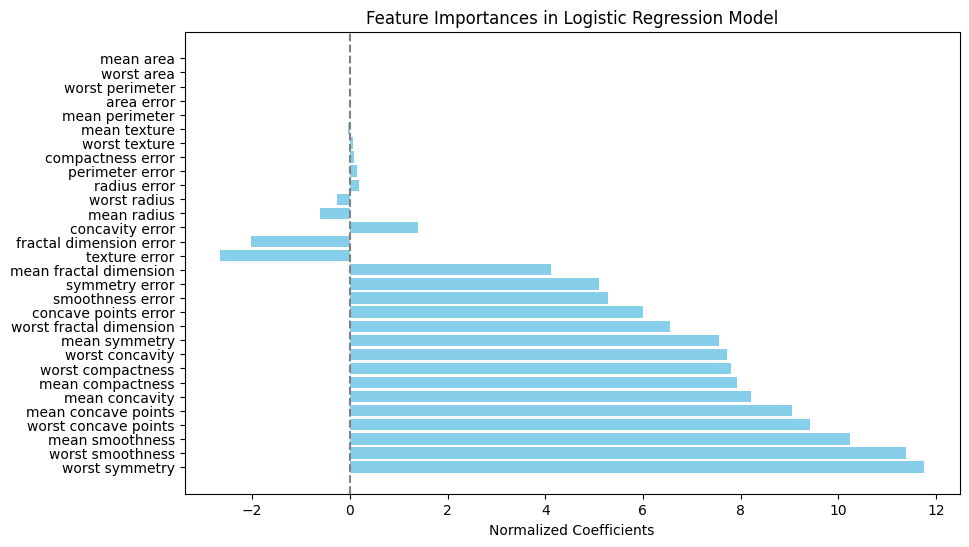

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [24]:


#Visualize the feature importances by creating a horizontal bar chart using e.g. barh. Based on magnitude, what appears to be the most
# important predictor of cancer in this dataset?
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients, color='skyblue')
plt.xlabel('Normalized Coefficients')
plt.title('Feature Importances in Logistic Regression Model')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0 for reference
plt.show()


print(X.columns)